# Gotowce w Pythonie
OpenCV, Tkinter

## OpenCV (Open Source Computer Vision Library)
otwartoźródłowa biblioteka zaimplementowanych algorytmów wizji komputerowej (computer vision) i uczenia maszynowego (machine learning).

`pip install opencv-python`

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

### Wczytywanie obrazu

cv2.imread(path, flag)

- path: Scieżka do obrazka.
- flag: Flaga określająca sposób wczytania obrazu. 
    - cv2.IMREAD_COLOR (domyślnie) - wczytanie kolorowego obrazu, kanał alfa opuszczony
    - cv2.IMREAD_GRAYSCALE - wczytanie obrazu w odcieniach szarości
    - cv2.IMREAD_UNCHANGED - wczytanie obrazu z uwzględnieniem kanału alfa

Funkcja zwraca wczytany obraz.

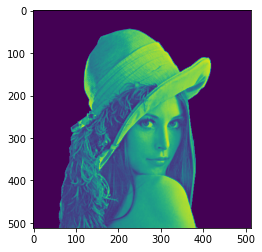

In [2]:
image = cv2.imread("./img/Lenna_alfa.png", 0)
# cv2.imshow("image", image) ### do użycia w skryptach; wywala Jupitera
plt.imshow(image);

### Problemy z wczytaniem obrazu

OpenCV wczytuje obraz w formacie BGR, matplotlib wyświetla obrazy w formacie RGB.

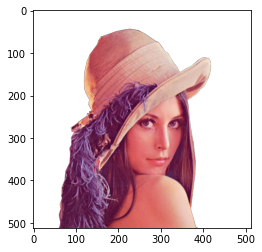

In [3]:
image = cv2.imread("./img/Lenna_alfa.png", -1) # -1, 0, 1
image = cv2.cvtColor(image, cv2.COLOR_BGRA2RGBA)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # bez uwzględnienia alfy
plt.imshow(image);

### Zmiana rozmiaru (skalowanie)

cv2.resize(image, (width, height), interpolation)

- image: Obraz.
- (width, height): Rozmiar nowego obrazu.
- interpolation:
    - cv2.INTER_NEAREST - znajduje najbliższego sąsiada i przyjmuje jego wartość
    - cv2.INTER_LINEAR (domyślnie) - interpolacja dwuliniowa
    - cv2.INTER_CUBIC - interpolacja dwusześcienna 
    - cv2.INTER_AREA
    - cv2.INTER_LANCZOS4
    - cv2.INTER_LINEAR_EXACT
    - cv2.INTER_NEAREST_EXACT

### Oryginalny obraz

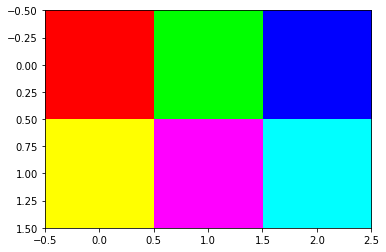

In [4]:
image = cv2.imread("./img/pixels.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image);

### Przykładowe powiększanie

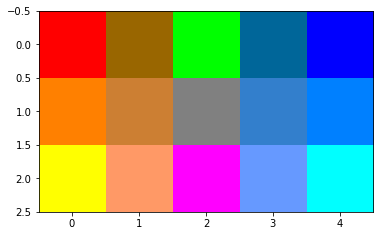

In [5]:
image = cv2.imread("./img/pixels.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
resized_image = cv2.resize(image, (5, 3), interpolation = cv2.INTER_LINEAR)
plt.imshow(resized_image);

### Przykładowe powiększanie

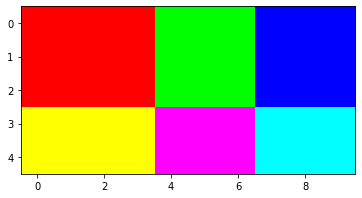

In [6]:
image = cv2.imread("./img/pixels.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
interpolation = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, 
                 cv2.INTER_AREA, cv2.INTER_LANCZOS4, 
                 cv2.INTER_LINEAR_EXACT, cv2.INTER_NEAREST_EXACT]
resized_image = cv2.resize(image, (10, 5), interpolation = interpolation[0])
plt.imshow(resized_image, interpolation='none');

### Przykładowe pomniejszanie

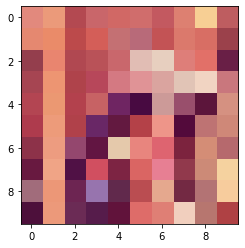

In [7]:
image = cv2.imread("./img/Lenna.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
interpolation = [cv2.INTER_NEAREST, cv2.INTER_LINEAR,
                 cv2.INTER_CUBIC, cv2.INTER_AREA, cv2.INTER_LANCZOS4, 
                 cv2.INTER_LINEAR_EXACT, cv2.INTER_NEAREST_EXACT]
resized_image = cv2.resize(image, (10, 10), interpolation = interpolation[0])
plt.imshow(resized_image, interpolation='none');

teoria do poczytania
- https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html
- https://pl.wikipedia.org/wiki/Interpolacja_(grafika_komputerowa)

### Rotacja

cv2.getRotationMatrix2D((x, y), angle, scale)
- (x, y): Punkt, wokół którego obraz będzie obracany.
- angle: Kąt obrotu.
- scale: Współczynnik skalowania obrazu.
- Zwraca macierz.

cv2.warpAffine(image, matrix, (cols, rows))
- image: Oryginalny obraz.
- matrix: Macierz określająca przekształcenie.
- (cols, rows): Rozmiar obróconego obrazu.

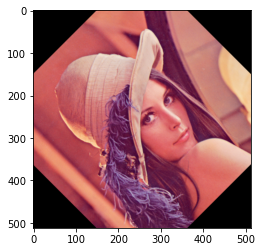

In [8]:
image = cv2.imread("./img/Lenna.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

(rows, cols) = image.shape[:2]
matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
rotated_image = cv2.warpAffine(image, matrix, (cols, rows))

plt.imshow(rotated_image);

### Przekształcenia macierzowe
- translacja (przesunięcie)
$$
T = \begin{pmatrix}
1 & 0 & t_{x}\\
0 & 1 & t_{y}
\end{pmatrix}
$$
- rotacja (obrót)
$$
R = \begin{pmatrix}
cos(\varphi) & -sin(\varphi) & 0\\
sin(\varphi) &  cos(\varphi) & 0
\end{pmatrix}
$$
- skalowanie
$$
S = \begin{pmatrix}
s_{x} & 0 & 0\\
0 & s_{y} & 0
\end{pmatrix}
$$

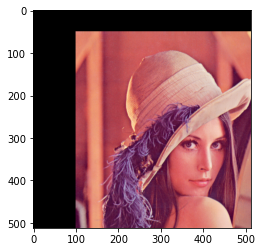

In [9]:
image = cv2.imread("./img/Lenna.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

(rows, cols) = image.shape[:2]

tx, ty = 100, 50 # TRANSLACJA
matrix = np.float32([[1, 0, tx], [0, 1, ty]]) #T

new_image = cv2.warpAffine(image, matrix, (cols, rows))
plt.imshow(new_image);

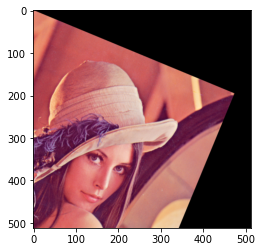

In [10]:
image = cv2.imread("./img/Lenna.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

(rows, cols) = image.shape[:2]

fi = math.pi/8 # ROTACJA
matrix = np.float32([[math.cos(fi), -math.sin(fi), 0], 
                     [math.sin(fi), math.cos(fi), 0]]) #R

new_image = cv2.warpAffine(image, matrix, (cols, rows))
plt.imshow(new_image);

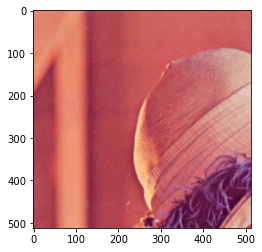

In [11]:
image = cv2.imread("./img/Lenna.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

(rows, cols) = image.shape[:2]

scale = 2 # SKALOWANIE
matrix = np.float32([[scale, 0, 0], [0, scale, 0]]) #S

new_image = cv2.warpAffine(image, matrix, (cols, rows))
plt.imshow(new_image);

### Przekształcenia macierzowe
Złożenie operacji na przykładzie rotacji względem środka obrazu:
- przesunięcie obrazu tak, aby środek obrazu znajdował się w punkcie 0, 0
- rotacja o podany kąt
- przesunięcie obrazu z powrotem

In [12]:
image = cv2.imread("./img/Lenna.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

(rows, cols) = image.shape[:2]
tx, ty = cols/2, rows/2 # TRANSLACJA
fi_, fi = 45, -math.pi/4 # ROTACJA, stopnie, radiany

# Podawany kąt mierzony przeciwnie do ruchu wskazówek zegara
matrix_1 = cv2.getRotationMatrix2D((tx, ty), fi_, 1)
new_image_1 = cv2.warpAffine(image, matrix_1, (cols, rows))
print("macierz 1: \n" + str(matrix_1))

macierz 1: 
[[   0.70710678    0.70710678 -106.03867197]
 [  -0.70710678    0.70710678  256.        ]]


In [13]:
# Podawany kąt mierzony zgodnie z ruchem wskazówek zegara
T = np.float32([[1, 0, tx], [0, 1, ty], [0, 0, 1]])
R = np.float32([[math.cos(fi), -math.sin(fi), 0], 
                [math.sin(fi),  math.cos(fi), 0], 
                [0,             0,            1]])
T2 = np.float32([[1, 0, -tx], [0, 1, -ty], [0, 0, 1]])
matrix_2 = np.matmul(R, T2)
matrix_2 = np.matmul(T, matrix_2)[:2]

print("macierz 2: \n" + str(matrix_2))
new_image_2 = cv2.warpAffine(image, matrix_2, (cols, rows))

macierz 2: 
[[   0.70710677    0.70710677 -106.038666  ]
 [  -0.70710677    0.70710677  256.        ]]


In [14]:
print("macierz 1: \n" + str(matrix_1))
print("macierz 2: \n" + str(matrix_2))

macierz 1: 
[[   0.70710678    0.70710678 -106.03867197]
 [  -0.70710678    0.70710678  256.        ]]
macierz 2: 
[[   0.70710677    0.70710677 -106.038666  ]
 [  -0.70710677    0.70710677  256.        ]]


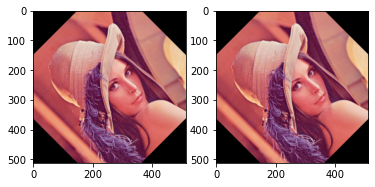

In [15]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(new_image_1)
ax[1].imshow(new_image_2);

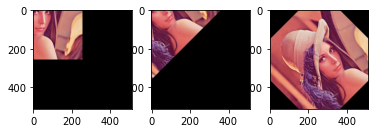

In [16]:
image = cv2.imread("./img/Lenna.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

(rows, cols) = image.shape[:2]
tx, ty, fi = cols/2, rows/2, -math.pi/4

# Podawany kąt mierzony zgodnie z ruchem wskazówek zegara
T = np.float32([[1, 0, tx], [0, 1, ty], [0, 0, 1]])
R = np.float32([[math.cos(fi), -math.sin(fi), 0], 
                [math.sin(fi),  math.cos(fi), 0], 
                [0,             0,            1]])
T2 = np.float32([[1, 0, -tx], [0, 1, -ty], [0, 0, 1]])
R_T2 = np.matmul(R, T2)
T_R_T2 = np.matmul(T, R_T2)

step_1 = cv2.warpAffine(image, T2[:2], (cols, rows))
step_2 = cv2.warpAffine(image, R_T2[:2], (cols, rows))
step_3 = cv2.warpAffine(image, T_R_T2[:2], (cols, rows))

fig, ax = plt.subplots(1, 3)
ax[0].imshow(step_1)
ax[1].imshow(step_2)
ax[2].imshow(step_3);

teoria do poczytania
- https://mst.mimuw.edu.pl/lecture.php?lecture=gk1&part=Ch4
- https://learnopencv.com/image-rotation-and-translation-using-opencv/

### Detekcja krawędzi
cv2.Canny(image, minVal, maxVal)
- kilkustopniowy algorytm wykrywania krawędzi
    - redukcja szumu (filtrem Gaussa)
    - gradient (z wykorzystaniem filtrów Sobela)
    - pocienianie krawędzi
    - progowanie z histerezą
- minVal: piksele poniżej tej wartości nie nie są uznawane za krawędzie
- maxVal: piksele powyżej tej wartości są na pewno krawędziami
- piksele pomiędzy minVal i maxVal są krawędziami, jeżeli są połączone z pikselami o wartości powyżej maxVal

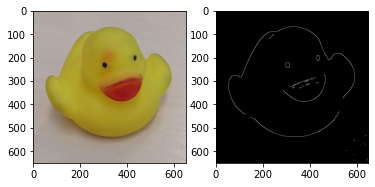

In [17]:
image = cv2.imread("./img/duck.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

new_image = cv2.Canny(image, 100, 150)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(image)
ax[1].imshow(new_image, cmap='gray');

### Detekcja krawędzi
cv2.Sobel(image, ddepth, dx, dy)
- ddepth: głębia obrazu (-1 ustawia głębię jak wejściowego obrazu)
- dx: rząd pochodnej po x; jeśli 1, szuka pionowych krawędzi
- dy: rząd pochodnej po y; jeśli 1, szuka poziomych krawędzi

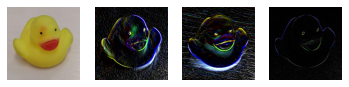

In [18]:
image = cv2.imread("./img/duck.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_blur = cv2.GaussianBlur(image, (3,3), sigmaX=0, sigmaY=0)

sobelx =  cv2.Sobel(src=img_blur, ddepth=-1, dx=1, dy=0, ksize=5)
sobely =  cv2.Sobel(src=img_blur, ddepth=-1, dx=0, dy=1, ksize=5)
sobelxy = cv2.Sobel(src=img_blur, ddepth=-1, dx=1, dy=1, ksize=5)

fig, ax = plt.subplots(1, 4)
ax[0].imshow(image);   ax[0].axis("off");
ax[1].imshow(sobelx);  ax[1].axis("off");
ax[2].imshow(sobely);  ax[2].axis("off");
ax[3].imshow(sobelxy); ax[3].axis("off");

teoria do poczytania
- https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html
- https://learnopencv.com/edge-detection-using-opencv/#sobel-edge
- http://aragorn.pb.bialystok.pl/~boldak/DIP/CPO-W04-v01-50pr.pdf (!)

### Swoje filtry
cv2.filter2D(image, ddepth, kernel)
- ddepth: -1 dla zachowania tej samej głębi
- kernel: maska filtru

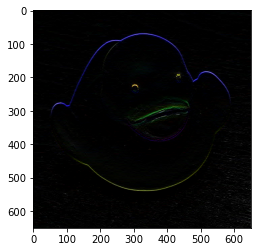

In [19]:
image = cv2.imread("./img/duck.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

kernel = np.array([[ 1,  2,  1], 
                   [ 0,  0,  0], 
                   [-1, -2, -1]])
image_filtered = cv2.filter2D(image, -1, kernel)
plt.imshow(image_filtered);

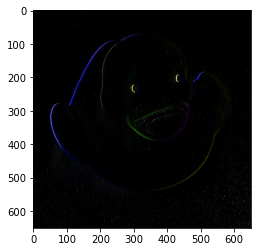

In [20]:
image = cv2.imread("./img/duck.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

kernel = np.array([[1, 0, -1], 
                   [2, 0, -2], 
                   [1, 0, -1]])
image_filtered = cv2.filter2D(image, -1, kernel)
plt.imshow(image_filtered);

### Inne przykładowe filtry i operacje na obrazach w OpenCV:
- rozmycie (blur)
- skala szarości
- erozja i dylatacja
- histogram i operacje na histogramie
- progowanie (różne i dużo)
- przejścia między przestrzeniami barw
- odszumianie
- detekcja kształtów...

### Więcej tutoriali:
- https://www.geeksforgeeks.org/opencv-python-tutorial/

## Tkinter
biblioteka do tworzenia GUI w Pythonie

`pip install tk`

### Nowe okno programu

In [21]:
import tkinter as tk

root = tk.Tk()
root.title("new window") # tytuł okna
root.geometry("300x100") # rozmiar - szerokość x wysokość
root.mainloop() # pętla główna

### Przykładowe kontrolki (Widgets)
- Label
- Button, Checkbutton, Radiobutton
- Entry, Text
- Combobox
- Scale...

wszystkie kontrolki jako pierwszy argument przyjmują okno (lub Frame), w którym się mają znaleźć

In [22]:
import tkinter as tk
from tkinter import ttk

root = tk.Tk()
root.title("widgets example")
root.geometry("300x200")

tk.Label(root, text="Label").pack()
tk.Button(root, text="Button").pack()
tk.Entry(root).pack()
tk.Checkbutton(root, text="Checkbutton").pack()
tk.Radiobutton(root, text="Radiobutton").pack()
ttk.Combobox(root, values=["", "Combobox", "Combobox2"]).pack()
tk.Scale(root, from_=0, to=10, orient=tk.HORIZONTAL).pack()

root.mainloop()

przykłady i lista kontrolek:
- https://coderslegacy.com/python/list-of-tkinter-widgets/

### Używanie ramek (Frame'ów)

In [23]:
import tkinter as tk

root = tk.Tk()
root.title("frame example")
root.geometry("300x200")

left_frame = tk.Frame(root)
left_frame.pack(side="left")
right_frame = tk.Frame(root)
right_frame.pack(side="right")

tk.Label(left_frame, text="Label").pack()
tk.Button(left_frame, text="Button").pack()

tk.Listbox(right_frame).pack(side="left")
tk.Scrollbar(right_frame).pack(side="right", fill="y")

root.mainloop()

### Sposoby upakowania kontrolek (Layout management)
- pack
    - expand: True/False - przy True stara się wypełniać pozostałą przestrzeń
    - fill:  "none"/"x"/"y"/"both" − przestrzeń, którą ma dodatkowow wypełniać 
    - side: "top"/"bottom"/"left"/"right" − w której części nadrzędnego elementu ma się znajdować
- grid
    - column: kolumna
    - row: rząd
    - rowspan: ile rzędów ma zajmować w kolumnie
    - columnspan: ile kolumn ma zajmować w rzędzie
- place
    - x, y: współrzędne...

In [24]:
import tkinter as tk

root = tk.Tk()
root.title("pack example")
root.geometry("300x200")

tk.Button(root, text="Button1").pack(expand=True)
tk.Button(root, text="Button2").pack(expand=True, fill="x")
tk.Button(root, text="Button3").pack(side="left")

root.mainloop()

In [25]:
import tkinter as tk

root = tk.Tk()
root.title("grid example")
root.geometry("300x200")

tk.Button(root, text="Button1").grid(row=0, column=0)
tk.Button(root, text="Button2").grid(row=0, column=1)
tk.Button(root, text="Button3").grid(row=1, column=0, columnspan=2)

root.mainloop()

In [26]:
import tkinter as tk

root = tk.Tk()
root.title("place example")
root.geometry("300x200")

tk.Label(root, text="Label1").place(x=110, y=120)
tk.Label(root, text="Label2").place(x=50, y=60)
tk.Label(root, text="Label3").place(x=190, y=80)

root.mainloop()

### Wyświetlanie obrazów (Label i Canvas)
- tk ma swoją klasę PhotoImage pozwalającą na załadowanie obrazka z podanego pliku
- obraz można pokazać w zależności od zastosowania na elementach typu Label albo Canvas

In [27]:
import tkinter as tk

root = tk.Tk()
root.title("image example")
root.geometry("400x200")

root.image = tk.PhotoImage(file='./img/lam.png')

canvas = tk.Canvas(root, width=200, height=200, bg='white')
canvas.pack(side="left")
canvas.create_image(0, 0, anchor='nw', image=root.image)

label = tk.Label(root)
label.pack(side="right")
label.config(image=root.image)

root.mainloop()

In [28]:
import tkinter as tk

root = tk.Tk()
root.title("canvas example")
root.geometry("512x512")

root.image = tk.PhotoImage(file='./img/Lenna.png')

canvas = tk.Canvas(root, width=512, height=512, bg='white')
canvas.pack()
canvas.create_image(0, 0, anchor='nw', image=root.image)
canvas.create_line(0, 0, 150, 350, 512, 512, width=10, fill="red")
canvas.create_line(0, 0, 150, 350, 512, 512, width=10, fill="blue", smooth=True)
canvas.create_oval(200, 200, 300, 350, width=10, outline="orange")
canvas.create_polygon(30, 30, 480, 460, 290, 90, 500, 250, width=10, fill="", outline="green")
canvas.create_text(250, 300, text="CANVAS")

root.mainloop()

inne opcje rysowania kształtów:
- https://anzeljg.github.io/rin2/book2/2405/docs/tkinter/create_line.html
- https://anzeljg.github.io/rin2/book2/2405/docs/tkinter/create_oval.html
- https://anzeljg.github.io/rin2/book2/2405/docs/tkinter/create_polygon.html
- https://anzeljg.github.io/rin2/book2/2405/docs/tkinter/create_rectangle.html
- https://anzeljg.github.io/rin2/book2/2405/docs/tkinter/create_text.html
- https://anzeljg.github.io/rin2/book2/2405/docs/tkinter/create_arc.html

## OpenCV + Tkinter

In [29]:
# filtry, live histogram

In [30]:
# TODO: przenieść obrazki do folderu images bo się bałagan robi

### interfejs graficzny
https://realpython.com/python-gui-tkinter/#building-your-first-python-gui-application-with-tkinter

### obrazek z urla
https://www.daniweb.com/programming/software-development/code/440946/display-an-image-from-a-url-tkinter-python

In [31]:
import tkinter as tk
import cv2

# import io
# from urllib.request import urlopen
# import base64

In [32]:
# image_url = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
# image_byt = urlopen(image_url).read()
# image_b64 = base64.b64encode(image_byt)

In [1]:
import tkinter as tk
import cv2
from PIL import Image
from PIL import ImageTk


root = tk.Tk()

greeting = tk.Label(root, text="Hello, Tkinter")
greeting.pack()

canvas = tk.Canvas(root, width=512, height=512, bg='white')
canvas.pack(expand='yes')

image = cv2.imread('img/Lenna.png')
root.original_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = Image.fromarray(root.original_image)
root.image = ImageTk.PhotoImage(image)

# root.image = tk.PhotoImage(file='Lenna.png')
canvas.create_image(0, 0, anchor='nw', image=root.image)





frame = tk.Frame(root)
frame.pack()


def blur_filter():
    image = cv2.blur(root.original_image, (5,5))
    image = Image.fromarray(image)
    root.image = ImageTk.PhotoImage(image)
    canvas.create_image(0, 0, anchor='nw', image=root.image)

    
button = tk.Button(frame, text="asd", command=blur_filter)
button.grid(column=0, row=0)

button2 = tk.Button(frame, text="asd")
button2.grid(column=1, row=0)


root.mainloop()

https://python.plainenglish.io/image-filtering-and-editing-in-python-with-code-e878d2a4415d

https://pyimagesearch.com/2016/05/23/opencv-with-tkinter/